In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset = pd.read_csv("train_ctrUa4K.csv")

In [3]:
dataset.shape

(614, 13)

In [4]:
data = dataset.sample(n = 550, random_state = 48)

In [5]:
data.to_csv('MameFasseSALL-2441202_2.csv')

In [6]:
data = pd.read_csv('MameFasseSALL-2441202_2.csv')

In [7]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
2,260,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
3,171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
4,522,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y


In [8]:
data=data.drop('Unnamed: 0', axis = 1)

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
2,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
3,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
4,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y


In [10]:
print(data.describe())
print(data.size)
print(data.ndim)
print(data.shape)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       550.000000         550.000000  533.000000        536.000000   
mean       5404.010909        1600.828945  145.195122        340.858209   
std        6294.468909        2998.437210   84.038365         66.035465   
min         150.000000           0.000000    9.000000         12.000000   
25%        2843.000000           0.000000  100.000000        360.000000   
50%        3787.500000        1106.000000  126.000000        360.000000   
75%        5741.000000        2297.250000  165.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      504.000000  
mean         0.839286  
std          0.367632  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
7150
2
(550, 13)


In [11]:
print('dimensions of orignal dataset', dataset.shape)

dimensions of orignal dataset (614, 13)


In [12]:
print('\ndimensions of new dataset', data.shape)


dimensions of new dataset (550, 13)


In [13]:
data['Education'].value_counts()

Education
Graduate        429
Not Graduate    121
Name: count, dtype: int64

In [14]:
columns = data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
2,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
3,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
4,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y


<Axes: >

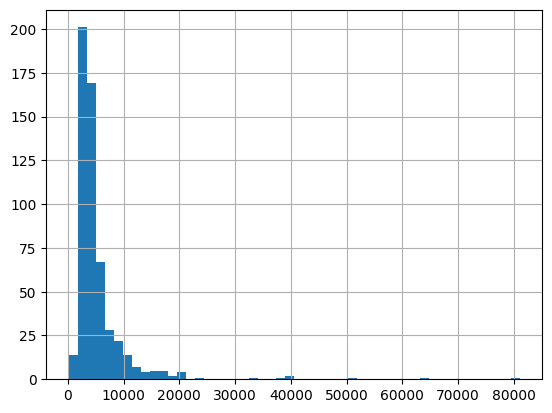

In [16]:
data['ApplicantIncome'].hist(bins=50)

<Axes: >

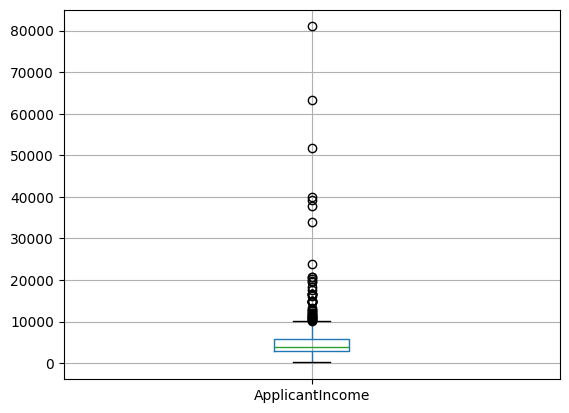

In [17]:
data.boxplot(column='ApplicantIncome')

<Axes: >

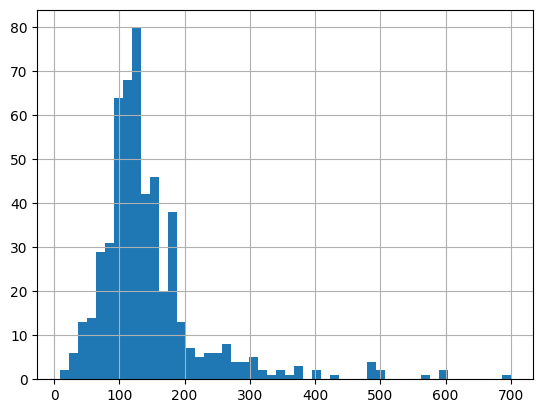

In [18]:
data['LoanAmount'].hist(bins=50)

<Axes: >

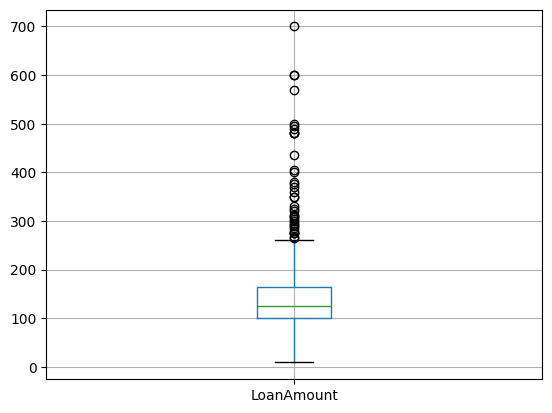

In [19]:
data.boxplot(column='LoanAmount')

In [20]:
data['Credit_History'].value_counts()

Credit_History
1.0    423
0.0     81
Name: count, dtype: int64

In [21]:
credit_history = data['Credit_History'].value_counts(ascending=True)
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)

Frequency Table for Credit History:
Credit_History
0.0     81
1.0    423
Name: count, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.074074
1.0                0.782506


In [22]:
data['Loan_Status'].value_counts()

Loan_Status
Y    371
N    179
Name: count, dtype: int64

In [23]:
data.shape

(550, 13)

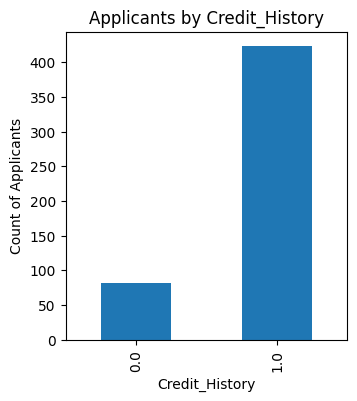

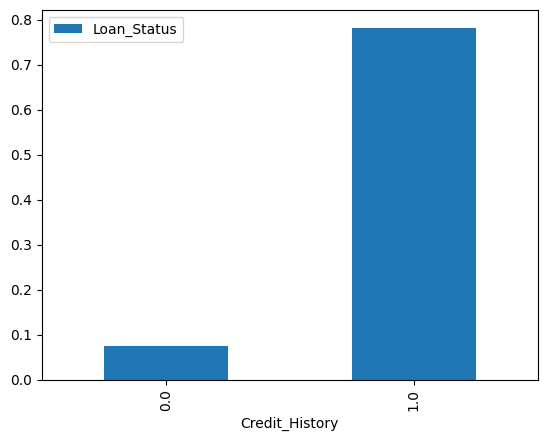

In [24]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')
plt.show()